# Predictions

In the main notebook, we trained different models, where the dependent variable `estimated_total_comprehensive_cost`. 

In this notebook, we will use those models to predict based on new data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.utils import Pickler, get_new_scaled_prediction, predict_on_models

In [2]:
models, features = Pickler('./data/models.pkl').load()
numeric_cols, categorical_cols, scaler = Pickler('./data/scaler.pkl').load()

In [3]:
df = pd.read_csv('./data/austin_car_crash_cleaned.csv')

In [4]:
print(f"Number of features: {len(features)}")

Number of features: 27


# Example

We first can test the models on a random sample from the dataset.

In [5]:
row = np.random.randint(0, df.shape[0])
example = df[features].iloc[row].copy()
print(example)

fatal_crash                           False
speed_limit                            40.0
sus_serious_injry_cnt                     0
nonincap_injry_cnt                        0
poss_injry_cnt                            2
non_injry_cnt                             1
unkn_injry_cnt                            0
motor_vehicle_death_count                 0
motor_vehicle_serious_injury_count        0
bicycle_death_count                       0
bicycle_serious_injury_count              0
pedestrian_death_count                    0
pedestrian_serious_injury_count           0
motorcycle_death_count                    0
motorcycle_serious_injury_count           0
other_death_count                         0
other_serious_injury_count                0
micromobility_serious_injury_count        0
micromobility_death_count                 0
severity_killed                       False
severity_not_injured                  False
severity_unknown                      False
unit_involved_motor_vehicle_othe

In [6]:
real_value = df['estimated_total_comprehensive_cost'].iloc[row]
print(f"Comprehensive Cost: {real_value}")

Comprehensive Cost: 420000


# Scale

In [7]:
new_prediction = get_new_scaled_prediction(
    example,
    scaler,
    numeric_cols
)
print(new_prediction)

fatal_crash                          -0.074608
speed_limit                          -0.466015
sus_serious_injry_cnt                -0.162936
nonincap_injry_cnt                   -0.442894
poss_injry_cnt                        2.170624
non_injry_cnt                         -0.51111
unkn_injry_cnt                       -0.284014
motor_vehicle_death_count            -0.048864
motor_vehicle_serious_injury_count   -0.132135
bicycle_death_count                  -0.011208
bicycle_serious_injury_count         -0.031244
pedestrian_death_count               -0.041657
pedestrian_serious_injury_count      -0.059496
motorcycle_death_count               -0.029972
motorcycle_serious_injury_count      -0.070738
other_death_count                          0.0
other_serious_injury_count           -0.004236
micromobility_serious_injury_count         0.0
micromobility_death_count                  0.0
severity_killed                      -0.074608
severity_not_injured                 -0.944844
severity_unkn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Results

In [8]:
results = predict_on_models(
    new_prediction,
    models
)
print(f"Predictions: {results}")

Predicting with linear_regression model...
The linear_regression model predicted: 42022.63

Predicting with ridge_regression model...
The ridge_regression model predicted: 42022.43

Predicting with lasso_regression model...
The lasso_regression model predicted: 40539.17

Predicting with decision_tree_regressor model...
The decision_tree_regressor model predicted: 42105.96

Predicting with random_forest_regressor model...
The random_forest_regressor model predicted: 42141.36

Predicting with svr model...
The svr model predicted: 41440.84

Predicting with k_neighbors_regressor model...
The k_neighbors_regressor model predicted: 42000.00

Predictions: {'linear_regression': 4.202262963177477, 'ridge_regression': 4.202242887562951, 'lasso_regression': 4.053916946609853, 'decision_tree_regressor': 4.210596026490068, 'random_forest_regressor': 4.214135862510464, 'svr': 4.144083566797665, 'k_neighbors_regressor': 4.2}


# Visualization

In [9]:
results = {model: result * 10000 for model, result in results.items()}

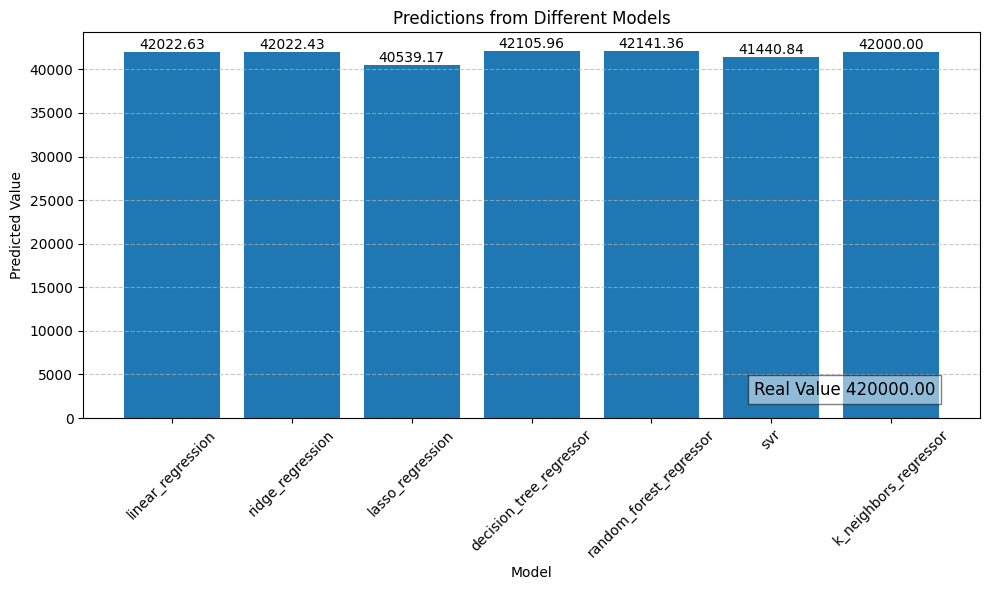

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xlabel('Model')
plt.ylabel('Predicted Value')
plt.title('Predictions from Different Models')

for i, v in enumerate(results.values()):
    plt.text(i, v + 0.1, str(f"{v:.2f}"), ha='center', va='bottom')

plt.text(
    0.95, 0.05,  # x and y coordinates in axes fraction (bottom-right corner)
    f"Real Value {real_value:.2f}", 
    ha='right', va='bottom', 
    transform=plt.gca().transAxes,
    fontsize=12, 
    bbox=dict(facecolor='white', alpha=0.5, edgecolor='black')
)

# plt.ylim(0, max(results.values()) + 1000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./image/already_seen_prediction.png')
plt.show()

# New Feature

In [11]:
# Change the values of the features
new_prediction = example.copy()
new_prediction['fatal_crash'] = True
new_prediction['speed_limit'] = 80
new_prediction['severity_killed'] = True

print(new_prediction)

fatal_crash                            True
speed_limit                              80
sus_serious_injry_cnt                     0
nonincap_injry_cnt                        0
poss_injry_cnt                            2
non_injry_cnt                             1
unkn_injry_cnt                            0
motor_vehicle_death_count                 0
motor_vehicle_serious_injury_count        0
bicycle_death_count                       0
bicycle_serious_injury_count              0
pedestrian_death_count                    0
pedestrian_serious_injury_count           0
motorcycle_death_count                    0
motorcycle_serious_injury_count           0
other_death_count                         0
other_serious_injury_count                0
micromobility_serious_injury_count        0
micromobility_death_count                 0
severity_killed                        True
severity_not_injured                  False
severity_unknown                      False
unit_involved_motor_vehicle_othe

In [12]:
new_prediction = get_new_scaled_prediction(
    new_prediction,
    scaler,
    numeric_cols
)

results = predict_on_models(
    new_prediction,
    models
)
print(f"Predictions: {results}")

Predicting with linear_regression model...
The linear_regression model predicted: 42936.72

Predicting with ridge_regression model...
The ridge_regression model predicted: 42981.67

Predicting with lasso_regression model...
The lasso_regression model predicted: 187756.24

Predicting with decision_tree_regressor model...
The decision_tree_regressor model predicted: 370000.00

Predicting with random_forest_regressor model...
The random_forest_regressor model predicted: 365610.00

Predicting with svr model...
The svr model predicted: 169672.63

Predicting with k_neighbors_regressor model...
The k_neighbors_regressor model predicted: 48729.11

Predictions: {'linear_regression': 4.293671993441762, 'ridge_regression': 4.298167477591078, 'lasso_regression': 18.775623887538263, 'decision_tree_regressor': 37.0, 'random_forest_regressor': 36.56099999999999, 'svr': 16.967262625744677, 'k_neighbors_regressor': 4.872911153653116}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


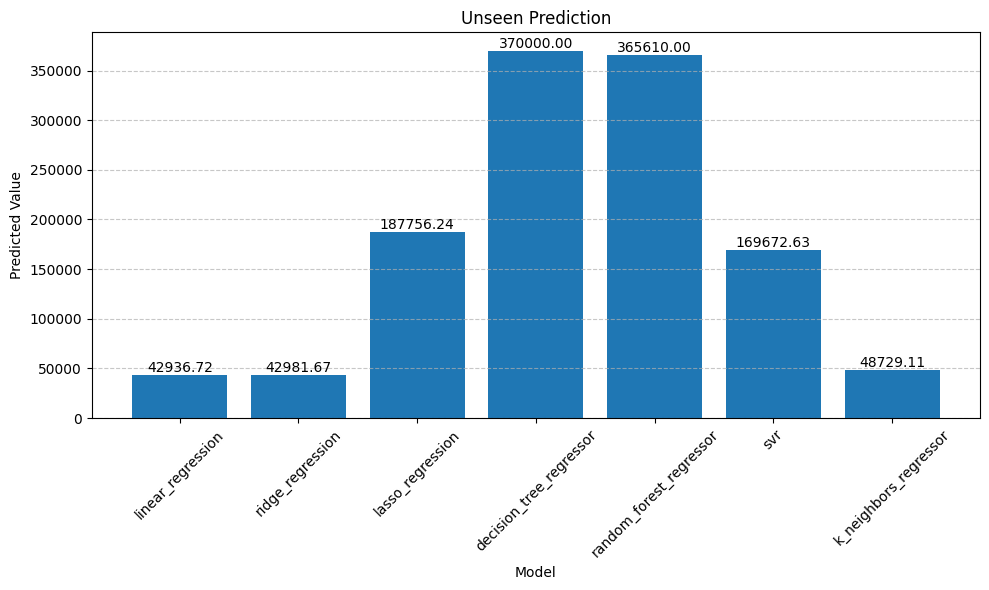

In [13]:
results = {model: result * 10000 for model, result in results.items()}

plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xlabel('Model')
plt.ylabel('Predicted Value')
plt.title('Unseen Prediction')

for i, v in enumerate(results.values()):
    plt.text(i, v + 0.1, str(f"{v:.2f}"), ha='center', va='bottom')

# plt.ylim(0, max(results.values()) + 1000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./image/unseen_prediction_results.png')
plt.show()